In [18]:
from SimEx import *
import matplotlib.pyplot as plt
import sys
import numpy as np

In [103]:
prop_path = '/gpfs/exfel/data/user/juncheng/hydratedProject/data/simulation/prop/prop_out_0000003.h5'
# prop_path = '/gpfs/exfel/data/user/juncheng/SPBProject/data/simulation/prop_3fs/prop_out_0000002.h5'
photon_analysis = XFELPhotonAnalysis(input_path=prop_path)


 Start initialization.

 Loading wavefront from /gpfs/exfel/data/user/juncheng/hydratedProject/data/simulation/prop/prop_out_0000003.h5.
 ... done.

 Getting intensities.
 ... done.
 Data dimensions =  (78, 78, 651)

 Masking NANs.
 ... done.



 Plotting total power.
Pulse energy 0.00044 J


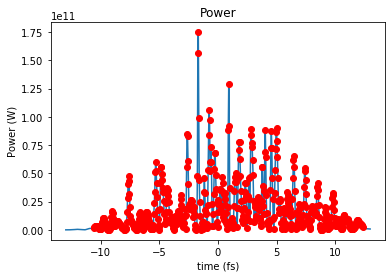

In [104]:
photon_analysis.plotTotalPower()

In [105]:
xs_mf, int0_mean = photon_analysis.dumpTotalPower()

x: Time (fs)
y: Power (W)
Pulse energy 0.00044 J


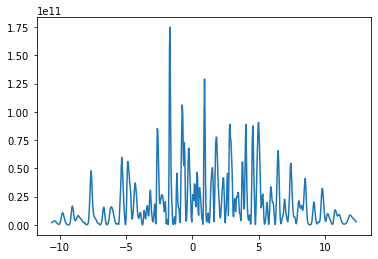

In [106]:
plt.plot(xs_mf,int0_mean)

In [107]:
dt = (xs_mf.max() - xs_mf.min())/(len(xs_mf) - 1)
print (dt,'fs')

0.03999999981931778 fs


## Binning

In [110]:
int_re =  np.histogram(xs_mf, bins=40, weights=int0_mean*dt)
new_t = np.linspace(0,xs_mf.max() - xs_mf.min(),40)
new_dt = new_t[1] - new_t[0]

Text(0.5, 0, 't (fs)')

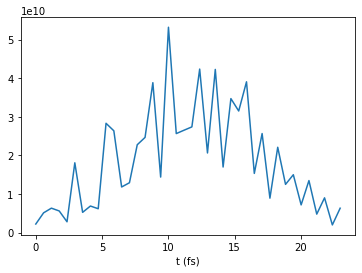

In [111]:
plt.plot(new_t, int_re[0]/new_dt)
plt.xlabel('t (fs)')

## Selection

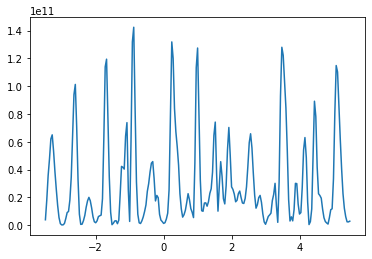

In [100]:
offset = 1
s_int = int0_mean[(xs_mf>-4.5+offset) & (xs_mf<4.5+offset)]
s_t = xs_mf[(xs_mf>-4.5+offset) & (xs_mf<4.5+offset)]
plt.plot(s_t, s_int)

## Binning

In [83]:
int_re =  np.histogram(s_t, bins=40, weights=s_int*dt)
new_t = np.linspace(0,s_t.max() - s_t.min(),40)
new_dt = new_t[1] - new_t[0]

Text(0.5, 0, 't (fs)')

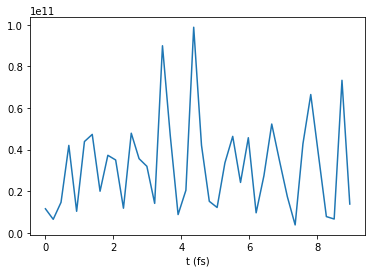

In [84]:
plt.plot(new_t, int_re[0]/new_dt)
plt.xlabel('t (fs)')

In [57]:
print (np.sum(int_re[0]), np.sum(int0_mean*dt))

448016680000.0 448016680000.0


## For GROMACS

In [11]:
with open("gromacs.txt", "w") as fh:
    for i,data in enumerate(zip(xs_mf, int0_mean)):
        fh.write('{:.5e} {:.5e}\n'.format(data[0],data[1]))

## For Cretin

In [43]:
with open("Cretin.txt", "w") as fh:
    for i,data in enumerate(zip(new_t, int_re[0]/new_dt)):
#         if i == 5:
#             break
        fh.write('history '+str(i)+' {:.5e}'.format(data[1])+' 1e-15\n')
        fh.write('tv '+str(data[0])+' 1\n')
        fh.write('tv '+str(data[0]+new_dt)+' 1\n')